In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t):
    return np.cos(2 * t) + 3 * t + 1


a0, a1, a2, a3 = 1.0, -1.4, 0.64, 41.52
a = np.array([a0, a1, a2, a3])

b1, b2, b3 = 1.0, 2.5, 6.0
b = np.array([b1, b2, b3])

A, B = 0.0, 1.5

In [14]:
def rk(f, y0, t0, t1, h=0.1):
    """
    Функция, решающяя систему дифференциальных уравнений через метод Рунге-Кутты
    """

    def f_system(t, y):
        y1, y2, y3 = y
        return np.array([
            y2,
            y3,
            (f(t) - a1 * y3 - a2 * y2 - a3 * y1) / a0
        ])

    t_arr = np.arange(t0, t1 + h, h)
    y_arr = np.zeros((len(t_arr), len(y0)))
    y_arr[0] = y0

    for i in range(0, len(t_arr) - 1):
        k1 = f_system(t_arr[i], y_arr[i])
        k2 = f_system(t_arr[i] + 0.5 * h, y_arr[i] + 0.5 * h * k1)
        k3 = f_system(t_arr[i] + 0.5 * h, y_arr[i] + 0.5 * h * k2)
        k4 = f_system(t_arr[i] + h, y_arr[i] + h * k3)
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_arr[i + 1] = y_arr[i] + h * k

    return t_arr, y_arr[:, 0]

In [21]:
y0 = np.array([b1, b2, b3])

h1, h2 = 0.1, 0.05
t1, y1 = rk(f, y0, A, B, h=h1)
t2, y2 = rk(f, y0, A, B, h=h2)

In [22]:
def runge_error(method, f, y0, A, B, h, p):
    t_h, y_h = method(f, y0, A, B, h)  # для h
    t_h_2, y_h_2 = method(f, y0, A, B, h / 2)  # для h / 2
    return (y_h_2[::2] - y_h) / (2 ** p - 1)


print(f'Ошибка Рунге для h={h1}: {np.abs(runge_error(rk, f, y0, A, B, h1, 4)).max()}')
print(f'Ошибка Рунге для h={h2}: {np.abs(runge_error(rk, f, y0, A, B, h2, 4)).max()}')

Ошибка Рунге для h=0.1: 0.0004816594762028596
Ошибка Рунге для h=0.05: 4.161083278404476e-05


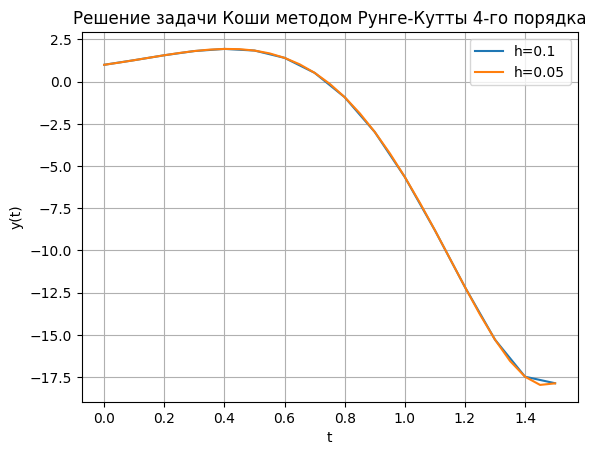

In [23]:
plt.plot(t1, y1, label=f'h={h1}')
plt.plot(t2, y2, label=f'h={h2}')
plt.title('Решение задачи Коши методом Рунге-Кутты 4-го порядка')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)